# Import datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_data.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
tdf = pd.read_csv("test_data.csv")
tdf.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


# Drop unwanted columns and rows

## Drop unnamed columns

In [4]:
df.drop("Unnamed: 0", axis=1,inplace = True)
tdf.drop("Unnamed: 0", axis=1,inplace = True)

## Drop NaN Rows

In [5]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
tdf.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [7]:
print(len(df))
print(len(tdf))

6019
1234


In [8]:
df.dropna(how='any', inplace=True,axis = 0)
tdf.dropna(how='any', inplace=True,axis = 0)

In [9]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [10]:
tdf.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
dtype: int64

# Convert datatype from object to float/int

In [11]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

## check whether there is null bhp or not

In [12]:
null_list_df=[]
null_list_tdf=[]
for i in df["Power"]:
    if i == "null bhp":
        null_list_df.append(i)
if len(null_list_df) == 0:
    print("no null bhp in df")
else:
    print(null_list_df)
for i in tdf["Power"]:
    if i == "null bhp":
        null_list_tdf.append(i)
if len(null_list_tdf) == 0:
    print("no null bhp in tdf")
else:
    print(null_list_df)

no null bhp in df
no null bhp in tdf


In [13]:
df['Mileage'] = df['Mileage'].str.rstrip('kmpl')
df['Mileage'] = df['Mileage'].str.rstrip('km/kg')
df['Power'] = df['Power'].str.rstrip(' bhp')
df['Engine'] = df['Engine'].str.rstrip(' CC')
df['New_Price'] = df['New_Price'].str.rstrip(' Lakh')

In [14]:
tdf['Mileage'] = tdf['Mileage'].str.replace(' kmpl', '')
tdf['Mileage'] = tdf['Mileage'].str.replace(' km/kg', '')
tdf['Power'] = tdf['Power'].str.replace(' bhp', '')
tdf['Engine'] = tdf['Engine'].str.replace(' CC', '')
tdf['New_Price'] = tdf['New_Price'].str.rstrip(' Lakh')

## change from str to int

In [15]:
df.Mileage = pd.to_numeric(df.Mileage, errors='coerce')
df.Power = pd.to_numeric(df.Power, errors='coerce')
df.Engine = pd.to_numeric(df.Engine, errors='coerce')
df.New_Price = pd.to_numeric(df.New_Price, errors='coerce')
tdf.Mileage = pd.to_numeric(tdf.Mileage, errors='coerce')
tdf.Power = pd.to_numeric(tdf.Power, errors='coerce')
tdf.Engine = pd.to_numeric(tdf.Engine, errors='coerce')
tdf.New_Price = pd.to_numeric(tdf.New_Price, errors='coerce')

In [16]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

# Data Analysis

## Reset index

In [17]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,4.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8.0,21.00,17.50
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462,103.25,5.0,10.65,9.95
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477,175.56,7.0,32.01,15.00
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995,190.00,5.0,47.87,18.55


In [18]:
tdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7.0,25.27
30,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,Diesel,Manual,Second,23.59,1364,67.06,5.0,9.27
36,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,Petrol,Automatic,First,14.84,1598,103.52,5.0,14.95
39,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48,1995,190.00,5.0,70.43
43,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,Petrol,Manual,First,15.41,1598,103.52,5.0,11.89


In [19]:
df = df.reset_index(drop=True)
tdf = tdf.reset_index(drop=True)

In [20]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,4.50
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8.0,21.00,17.50
2,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462,103.25,5.0,10.65,9.95
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477,175.56,7.0,32.01,15.00
4,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995,190.00,5.0,47.87,18.55


In [21]:
tdf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7.0,25.27
1,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,Diesel,Manual,Second,23.59,1364,67.06,5.0,9.27
2,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,Petrol,Automatic,First,14.84,1598,103.52,5.0,14.95
3,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48,1995,190.00,5.0,70.43
4,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,Petrol,Manual,First,15.41,1598,103.52,5.0,11.89


## Plot the columns that its datatype aren't numbers

In [22]:
x = df.groupby('Fuel_Type').sum().index
y = df.groupby('Fuel_Type')['Name'].count()

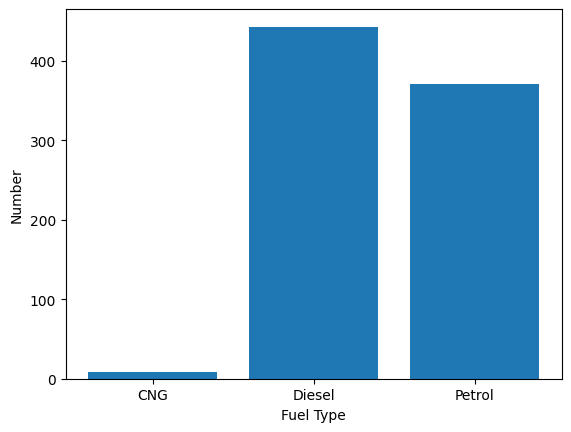

In [23]:
plt.bar(x, y)
plt.xlabel('Fuel Type')
plt.ylabel('Number')
plt.show()

In [24]:
x1 = df.groupby('Owner_Type').sum().index
y1 = df.groupby('Owner_Type')['Name'].count()

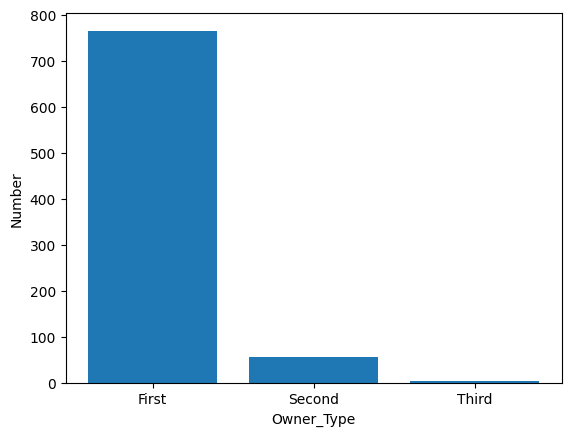

In [25]:
plt.bar(x1, y1)
plt.xlabel('Owner_Type')
plt.ylabel('Number')
plt.show()

In [26]:
x2 = df.groupby('Transmission').sum().index
y2 = df.groupby('Transmission')['Name'].count()

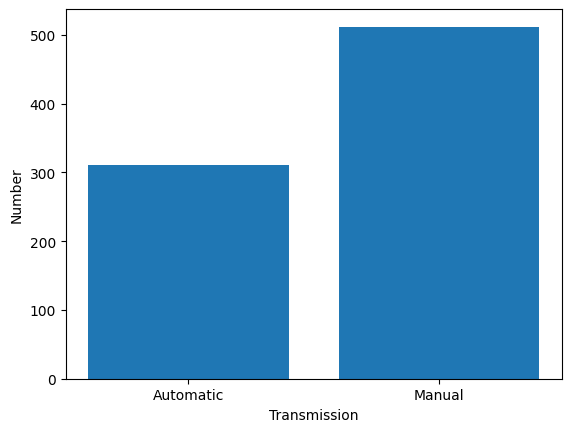

In [27]:
plt.bar(x2, y2)
plt.xlabel('Transmission')
plt.ylabel('Number')
plt.show()

In [28]:
print("Most important features relative to Price-target")
numeric_vals = df.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
numeric_corr.sort_values(["Price"], ascending = False, inplace = True)
print(numeric_corr.Price)

Most important features relative to Price-target
Price                1.000000
New_Price            0.903636
Power                0.777187
Engine               0.696675
Year                 0.227202
Seats                0.046168
Kilometers_Driven   -0.154463
Mileage             -0.433571
Name: Price, dtype: float64


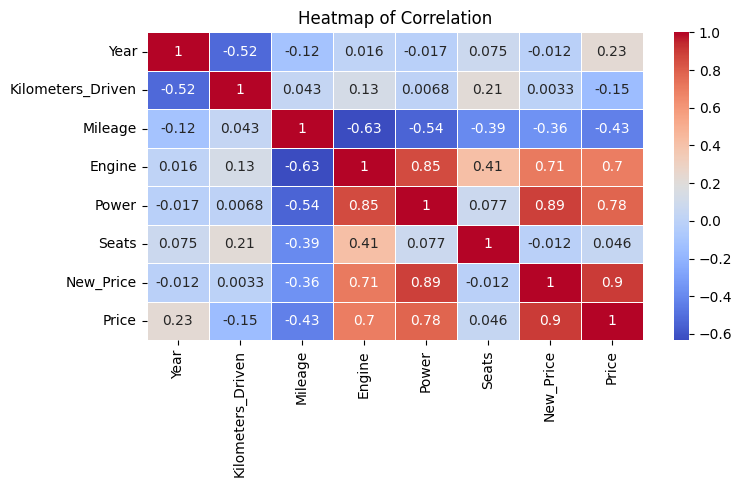

In [29]:
plt.figure(figsize=(8,4))
sns.heatmap(numeric_vals.corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap of Correlation')
plt.show()

## Approach 1: fill in non-float index with mean/median

In [30]:
grouped = df.groupby(df.Fuel_Type)
df_petrol = grouped.get_group("Petrol")
df_diesel = grouped.get_group("Diesel")
df_CNG = grouped.get_group("CNG")

In [31]:
print("Mean price of petrol cars:" ,df_petrol.Price.mean())
print("Mean price of diesel cars:" ,df_diesel.Price.mean())
print("Mean price of CNG cars:" ,df_CNG.Price.mean())

Mean price of petrol cars: 8.577601078167115
Mean price of diesel cars: 18.098374717832957
Mean price of CNG cars: 3.5677777777777777


In [32]:
grouped = df.groupby(df.Owner_Type)
df_first = grouped.get_group("First")
df_second = grouped.get_group("Second")
df_third = grouped.get_group("Third")

In [33]:
print("Mean price of first owned cars:" ,df_first.Price.mean())
print("Mean price of second owned cars:" ,df_second.Price.mean())
print("Mean price of third owned cars:" ,df_third.Price.mean())

Mean price of first owned cars: 13.82303267973856
Mean price of second owned cars: 11.84381818181818
Mean price of third owned cars: 1.9833333333333334


In [34]:
grouped = df.groupby(df.Transmission)
df_manual = grouped.get_group("Manual")
df_automatic = grouped.get_group("Automatic")

In [35]:
print("Mean price of manual cars:" ,df_manual.Price.mean())
print("Mean price of automatic cars:" ,df_automatic.Price.mean())

Mean price of manual cars: 7.341933593749999
Mean price of automatic cars: 24.028649517684887


## Approach 2: Use get_dummies to deal with non-float columns

In [36]:
df1 = pd.get_dummies(df, prefix=['Transmission', 'Owner_Type',"Fuel_Type"], 
               columns=['Transmission', 'Owner_Type',"Fuel_Type"],dtype = int)
df1.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,Honda Jazz V,Chennai,2011,46000,18.20,1199,88.70,5.0,8.61,4.50,0,1,1,0,0,0,0,1
1,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,11.36,2755,171.50,8.0,21.00,17.50,1,0,1,0,0,0,1,0
2,Maruti Ciaz Zeta,Kochi,2018,25692,21.56,1462,103.25,5.0,10.65,9.95,0,1,1,0,0,0,0,1
3,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,13.50,2477,175.56,7.0,32.01,15.00,0,1,1,0,0,0,1,0
4,BMW 3 Series 320d,Kochi,2014,32982,22.69,1995,190.00,5.0,47.87,18.55,1,0,1,0,0,0,1,0


In [37]:
tdf1 = pd.get_dummies(tdf, prefix=['Transmission', 'Owner_Type',"Fuel_Type"], 
               columns=['Transmission', 'Owner_Type',"Fuel_Type"],dtype = int)
tdf1.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,13.68,2393,147.80,7.0,25.27,0,1,1,0,0,1,0
1,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,23.59,1364,67.06,5.0,9.27,0,1,0,1,0,1,0
2,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,14.84,1598,103.52,5.0,14.95,1,0,1,0,0,0,1
3,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,22.48,1995,190.00,5.0,70.43,1,0,1,0,0,1,0
4,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,15.41,1598,103.52,5.0,11.89,0,1,1,0,0,0,1


## Deal with Name and Location

In [38]:
df1["Brand"] = df1.Name.str.split(" ").str[0]
df1["Model"] = df1.Name.str.split(" ").str[1]
df1.drop('Name', axis=1, inplace=True)
tdf1["Brand"] = tdf1.Name.str.split(" ").str[0]
tdf1["Model"] = tdf1.Name.str.split(" ").str[1]
tdf1.drop('Name', axis=1, inplace=True)

In [39]:
df1.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Brand,Model
0,Chennai,2011,46000,18.20,1199,88.70,5.0,8.61,4.50,0,1,1,0,0,0,0,1,Honda,Jazz
1,Mumbai,2016,36000,11.36,2755,171.50,8.0,21.00,17.50,1,0,1,0,0,0,1,0,Toyota,Innova
2,Kochi,2018,25692,21.56,1462,103.25,5.0,10.65,9.95,0,1,1,0,0,0,0,1,Maruti,Ciaz
3,Delhi,2014,110000,13.50,2477,175.56,7.0,32.01,15.00,0,1,1,0,0,0,1,0,Mitsubishi,Pajero
4,Kochi,2014,32982,22.69,1995,190.00,5.0,47.87,18.55,1,0,1,0,0,0,1,0,BMW,3


In [40]:
df1.drop(["Model"], axis = 1, inplace=True)
tdf1.drop(["Model"], axis = 1, inplace=True)

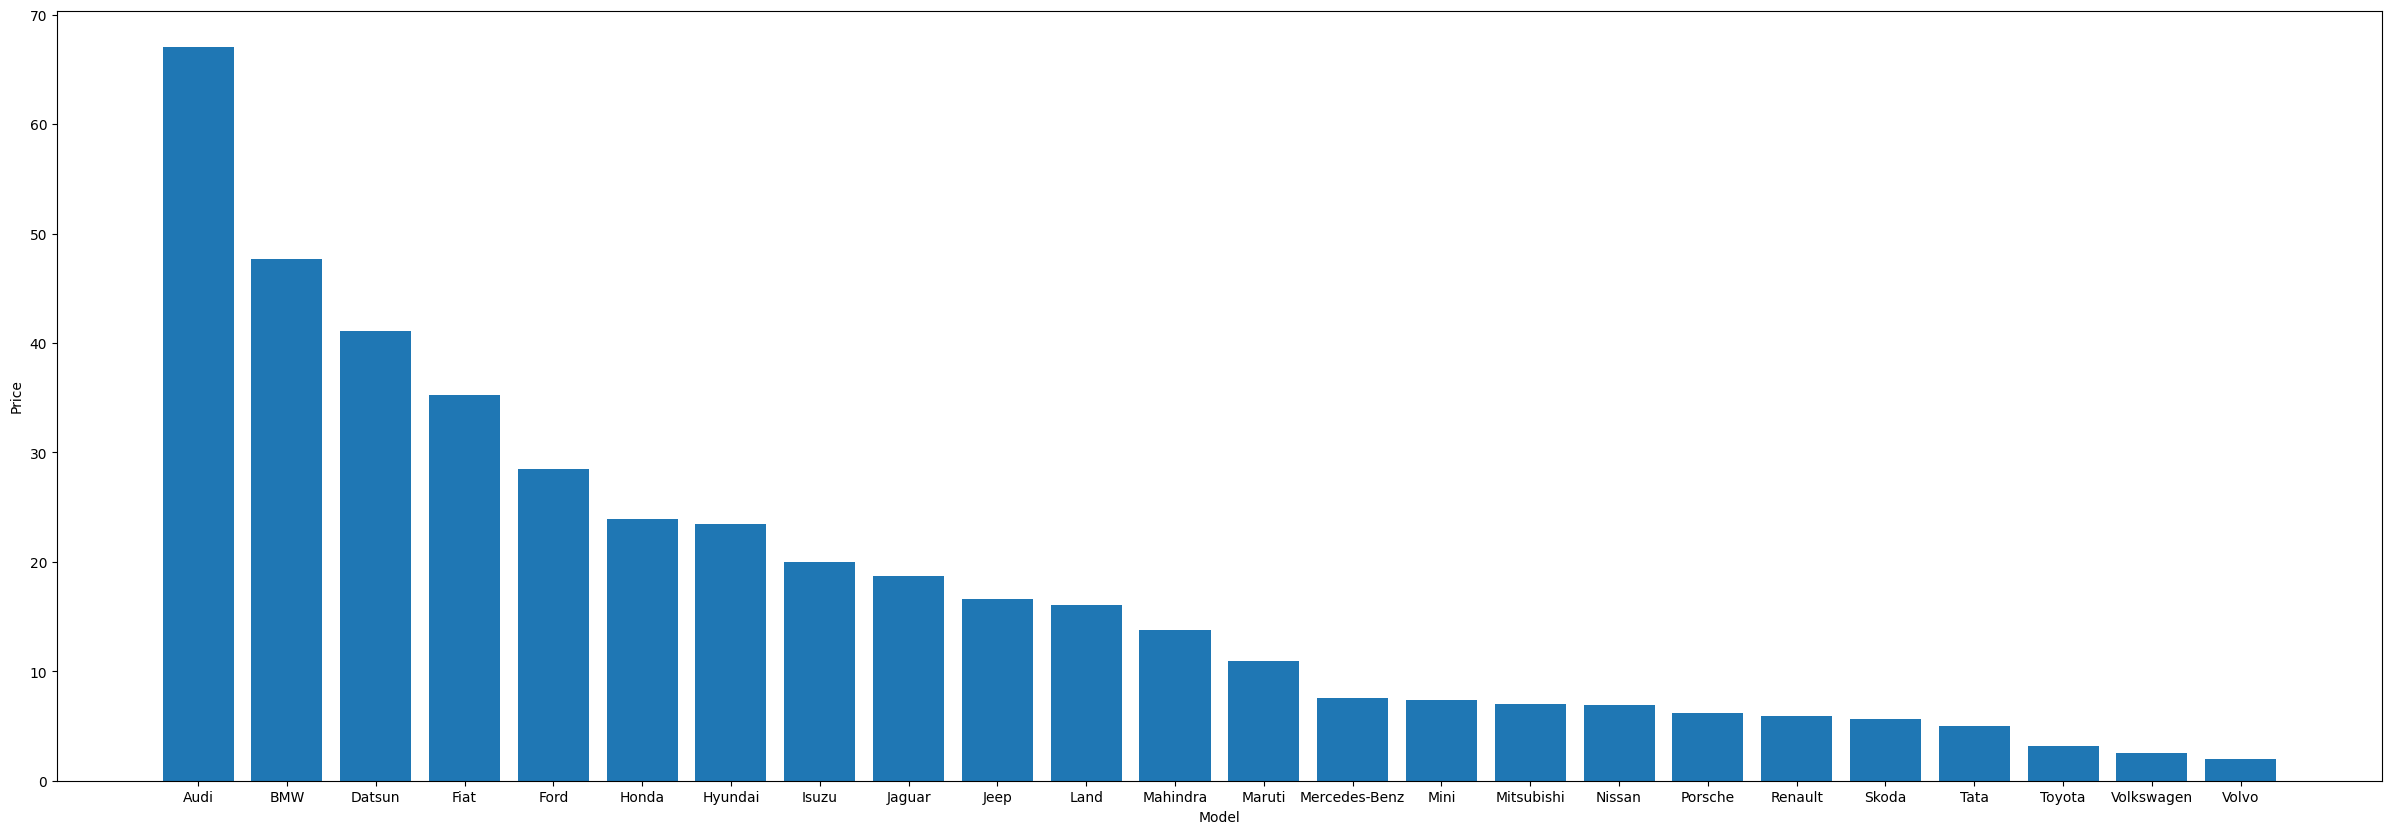

In [41]:
x3 = df1.groupby('Brand').sum().index
y3 = df1.groupby('Brand')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(30,10))
plt.bar(x3, y3)
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

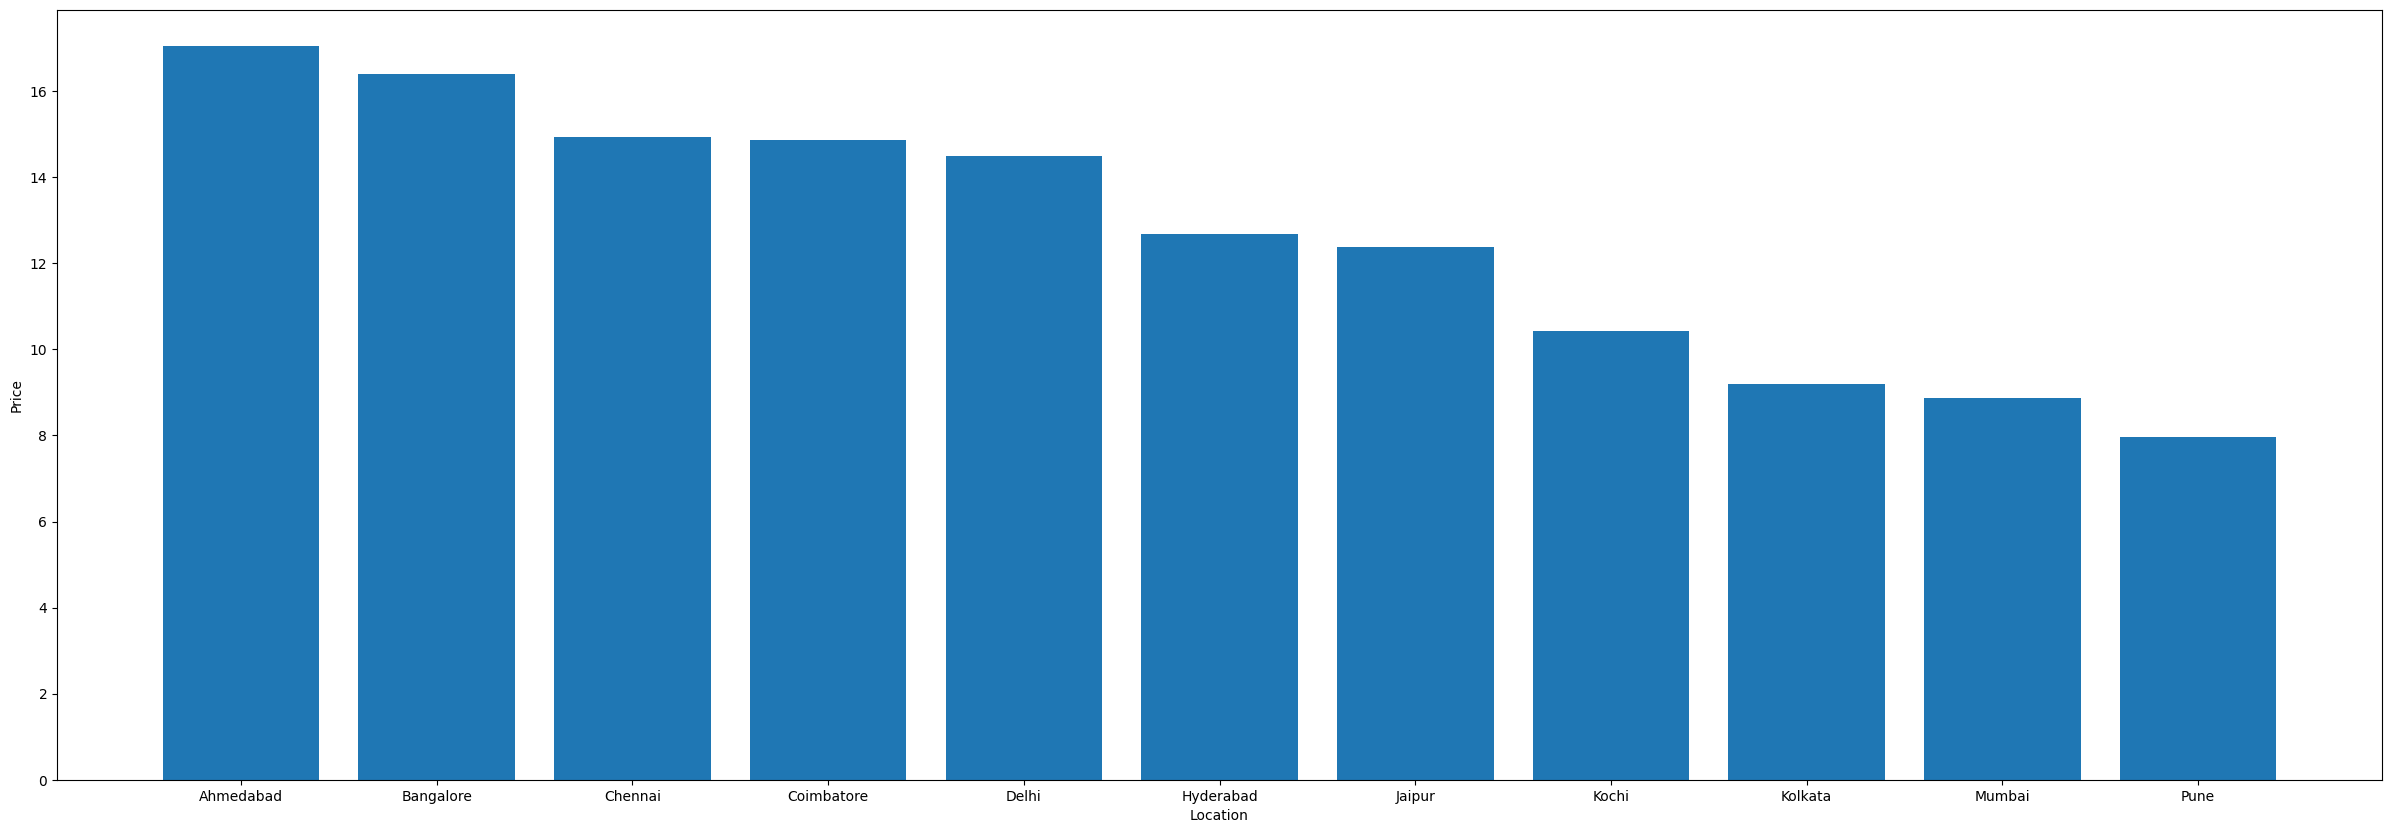

In [42]:
x4 = df1.groupby('Location').sum().index
y4 = df1.groupby('Location')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(30,10))
plt.bar(x4, y4)
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()

In [43]:
# make a dictionary using brand
brand_list = list(x3)
brand_dict = dict(list(enumerate(brand_list)))
brand_dict = {value:key  for key,value in brand_dict.items()}
#change Brand into numbers according to their value
df1["Brand"] = df1["Brand"].map(brand_dict)
tdf1["Brand"] = tdf1["Brand"].map(brand_dict)

In [44]:
# make a dictionary using location
location_list = list(x4)
location_dict = dict(list(enumerate(location_list)))
brand_dict = {value:key  for key,value in location_dict.items()}
#change Location into numbers according to their value
df1["Location"] = df1["Location"].map(brand_dict)
tdf1["Location"] = tdf1["Location"].map(brand_dict)

In [45]:
df1

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Brand
0,2,2011,46000,18.20,1199,88.70,5.0,8.61,4.50,0,1,1,0,0,0,0,1,5
1,9,2016,36000,11.36,2755,171.50,8.0,21.00,17.50,1,0,1,0,0,0,1,0,21
2,7,2018,25692,21.56,1462,103.25,5.0,10.65,9.95,0,1,1,0,0,0,0,1,12
3,4,2014,110000,13.50,2477,175.56,7.0,32.01,15.00,0,1,1,0,0,0,1,0,15
4,7,2014,32982,22.69,1995,190.00,5.0,47.87,18.55,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,2,2016,10000,17.57,1193,88.70,5.0,7.77,4.00,0,1,1,0,0,0,0,1,20
819,9,2011,38000,16.09,1598,103.50,5.0,11.91,3.25,0,1,1,0,0,0,0,1,22
820,10,2016,37208,24.30,1248,88.50,5.0,9.93,7.43,0,1,1,0,0,0,1,0,12
821,4,2013,33746,18.50,1198,86.80,5.0,6.63,3.20,0,1,1,0,0,0,0,1,5


In [46]:
print("Most important features relative to Price-target")
numeric_vals = df1.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
numeric_corr.sort_values(["Price"], ascending = False, inplace = True)
print(numeric_corr.Price)

Most important features relative to Price-target
Price                     1.000000
New_Price                 0.903636
Power                     0.777187
Engine                    0.696675
Transmission_Automatic    0.544773
Fuel_Type_Diesel          0.323575
Year                      0.227202
Seats                     0.046168
Owner_Type_First          0.042898
Owner_Type_Second        -0.032502
Location                 -0.038807
Owner_Type_Third         -0.047505
Fuel_Type_CNG            -0.071366
Brand                    -0.112230
Kilometers_Driven        -0.154463
Fuel_Type_Petrol         -0.309283
Mileage                  -0.433571
Transmission_Manual      -0.544773
Name: Price, dtype: float64


# Building a machine learning model

## Train Test Split

In [47]:
df1.dropna(how='any', inplace=True,axis = 0)
tdf1.dropna(how='any', inplace=True,axis = 0)

In [48]:
X = df1.drop(["Price"], axis=1)
X = X.values
y = df1['Price'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

In [50]:
print(X_train.shape)
print(X_test.shape)

(644, 17)
(162, 17)


## Standardization

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import math

In [53]:
#Comparing accuracy of models which we could have used
regressors = [
    ['MultiLinearRegressor', LinearRegression()],
    ['DecisionTreeRegressor', DecisionTreeRegressor()],
    ['RandomForestRegressor', RandomForestRegressor()],
    ['GradientBoostingRegressor', GradientBoostingRegressor()],
    ['XGBRegressor', XGBRegressor()]
]

resultsacc1 = []
resultsacc2 = []

for model in regressors:
    name = model[0]
    mod = model[1]
    
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    
    #Errors Metrics
    mse = metrics.mean_squared_error(y_pred,y_test)
    rmse = math.sqrt(mse)
    mae = metrics.mean_absolute_error(y_pred,y_test)
    
    #Accuracy Metrics
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    acctrs = mod.score(X_train, y_train)
    acctes = mod.score(X_test, y_test)
    
    resultsacc1.append({'Model': name, 'AccuracyTraining': acctrs, 'AccuracyTesting': acctes})
    resultsacc2.append({'Model': name, 'MeanSqauredError': mse, 'RootMeanSquareError': rmse, 'MeanAbsoluteError': mae})
    
results1_df = pd.DataFrame(resultsacc1)
results2_df = pd.DataFrame(resultsacc2)


print("Accuracy: \n",results1_df)
print("Error: \n",results2_df)

Accuracy: 
                        Model  AccuracyTraining  AccuracyTesting
0       MultiLinearRegressor          0.915111         0.892366
1      DecisionTreeRegressor          1.000000         0.904015
2      RandomForestRegressor          0.992555         0.938097
3  GradientBoostingRegressor          0.992810         0.942501
4               XGBRegressor          0.999984         0.928242
Error: 
                        Model  MeanSqauredError  RootMeanSquareError  \
0       MultiLinearRegressor         23.718116             4.870125   
1      DecisionTreeRegressor         21.151186             4.599042   
2      RandomForestRegressor         13.640870             3.693355   
3  GradientBoostingRegressor         12.670432             3.559555   
4               XGBRegressor         15.812498             3.976493   

   MeanAbsoluteError  
0           3.125470  
1           2.248148  
2           1.780980  
3           1.662454  
4           1.774381  


## Pick the top three regressors
The above comparision makes the inference that XGBRegressor,RandomForestRegressor,GradientBoostingRegressor are more accurate in training and testing.

In [54]:
model_XGB = XGBRegressor(n_estimators=1000)
model_RF = RandomForestRegressor(n_estimators=1000)
model_GB = GradientBoostingRegressor(n_estimators=1000)

In [55]:
model_XGB.fit(X_train, y_train)
model_RF.fit(X_train, y_train)
model_GB.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

In [56]:
y_pred_XGB = model_XGB.predict(X_test)
y_pred_RF = model_RF.predict(X_test)
y_pred_GB = model_GB.predict(X_test)

## Obtaining the mse, rmse, and mae of each regressors

In [57]:
import math
mse1 = metrics.mean_squared_error(y_pred_XGB,y_test)
mse2 = metrics.mean_squared_error(y_pred_RF,y_test)
mse3 = metrics.mean_squared_error(y_pred_GB,y_test)
rmse1 = math.sqrt(mse1)
rmse2 = math.sqrt(mse2)
rmse3 = math.sqrt(mse3)
mae1 = metrics.mean_absolute_error(y_pred_XGB,y_test)
mae2 = metrics.mean_absolute_error(y_pred_RF,y_test)
mae3 = metrics.mean_absolute_error(y_pred_GB,y_test)
vals = {
    'Type of Error': ['Mean Squared Error for XGB', 'Root Mean Squared Error for XGB', 'Mean Absolute Error for XGB',
                      'Mean Squared Error for RF', 'Root Mean Squared Error for RF', 'Mean Absolute Error for RF',
                      'Mean Squared Error for GB', 'Root Mean Squared Error for GB', 'Mean Absolute Error for GB'],
    'Value of Error': [mse1, rmse1, mae1,mse2, rmse2, mae2,mse3, rmse3, mae3]
}
pd.DataFrame(vals)

,Type of Error,Value of Error
0,Mean Squared Error for XGB,15.815254
1,Root Mean Squared Error for XGB,3.976840
2,Mean Absolute Error for XGB,1.773784
3,Mean Squared Error for RF,13.499004
4,Root Mean Squared Error for RF,3.674099
5,Mean Absolute Error for RF,1.728706
6,Mean Squared Error for GB,12.332687
7,Root Mean Squared Error for GB,3.511793
8,Mean Absolute Error for GB,1.656677


## Plot out the results!

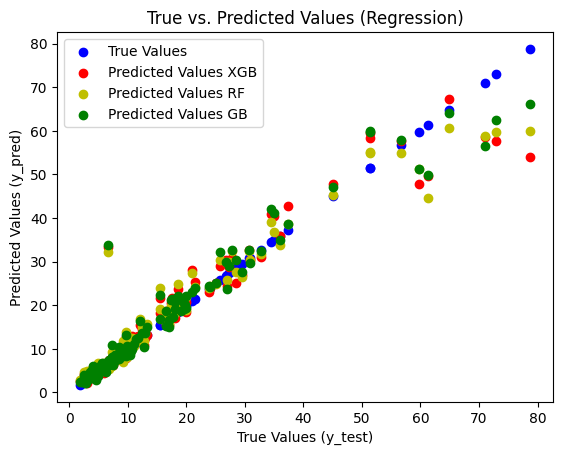

In [58]:
plt.scatter(y_test, y_test, color="b", label='True Values')
plt.scatter(y_test, y_pred_XGB, color="r", label='Predicted Values XGB')
plt.scatter(y_test, y_pred_RF, color="y", label='Predicted Values RF')
plt.scatter(y_test, y_pred_GB, color="g", label='Predicted Values GB')
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("True vs. Predicted Values (Regression)")

# Create a legend to label the points
plt.legend()
plt.show()

# Predict using test-data

## Prepare dataset for machine learning

In [59]:
tdf1.head()
#find out that there are only 14 columns(missing Owner_Type_Third)

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Brand
0,9,2017,34000,13.68,2393,147.80,7.0,25.27,0,1,1,0,0,1,0,21.0
1,2,2014,70000,23.59,1364,67.06,5.0,9.27,0,1,0,1,0,1,0,21.0
2,9,2017,13500,14.84,1598,103.52,5.0,14.95,1,0,1,0,0,0,1,19.0
3,9,2012,66889,22.48,1995,190.00,5.0,70.43,1,0,1,0,0,1,0,1.0
4,6,2018,4000,15.41,1598,103.52,5.0,11.89,0,1,1,0,0,0,1,19.0


In [60]:
Owner_Type_3 = [0]*179
tdf1.insert(11, "Owner_Type_Third", Owner_Type_3, True)

In [61]:
tdf1.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Third,Owner_Type_Second,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Brand
0,9,2017,34000,13.68,2393,147.80,7.0,25.27,0,1,1,0,0,0,1,0,21.0
1,2,2014,70000,23.59,1364,67.06,5.0,9.27,0,1,0,0,1,0,1,0,21.0
2,9,2017,13500,14.84,1598,103.52,5.0,14.95,1,0,1,0,0,0,0,1,19.0
3,9,2012,66889,22.48,1995,190.00,5.0,70.43,1,0,1,0,0,0,1,0,1.0
4,6,2018,4000,15.41,1598,103.52,5.0,11.89,0,1,1,0,0,0,0,1,19.0


## Use the model obtained previously to predict

In [62]:
Xt = tdf1.values
Xt = scaler.fit_transform(Xt)
yt_pred_XGB = model_XGB.predict(Xt)
yt_pred_RF = model_RF.predict(Xt)
yt_pred_GB = model_GB.predict(Xt)

## Plot out the results!

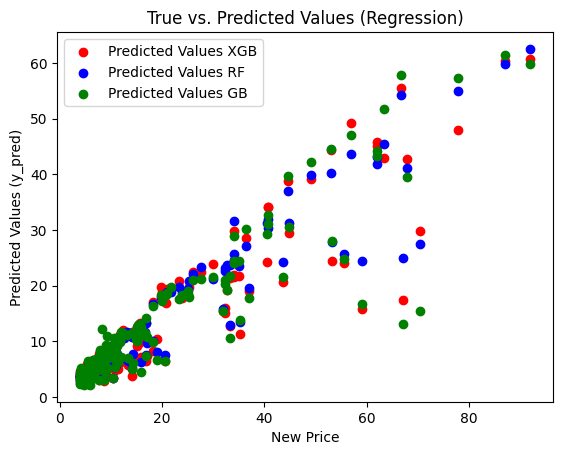

In [63]:
NewP = tdf1.New_Price

#plt.scatter(NewP,NewP, color="b", label='New Price')
plt.scatter(NewP, yt_pred_XGB, color="r", label='Predicted Values XGB')
plt.scatter(NewP, yt_pred_RF, color="b", label='Predicted Values RF')
plt.scatter(NewP, yt_pred_GB, color="g", label='Predicted Values GB')
plt.xlabel("New Price")
plt.ylabel("Predicted Values (y_pred)")
plt.title("True vs. Predicted Values (Regression)")

# Create a legend to label the points
plt.legend()
plt.show()

## Create a new dataframe including the predicted price

In [64]:
tdf2 = tdf1.copy()
tdf2.insert(17, "Price_XGB", yt_pred_XGB, True)
tdf2.insert(18, "Price_RF", yt_pred_RF, True)
tdf2.insert(19, "Price_GB", yt_pred_GB, True)

In [65]:
tdf2

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Third,Owner_Type_Second,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Brand,Price_XGB,Price_RF,Price_GB
0,9,2017,34000,13.68,2393,147.80,7.0,25.27,0,1,1,0,0,0,1,0,21.0,19.859547,20.87965,17.909021
1,2,2014,70000,23.59,1364,67.06,5.0,9.27,0,1,0,0,1,0,1,0,21.0,5.280846,5.72753,5.195678
2,9,2017,13500,14.84,1598,103.52,5.0,14.95,1,0,1,0,0,0,0,1,19.0,11.431402,10.92052,10.989594
3,9,2012,66889,22.48,1995,190.00,5.0,70.43,1,0,1,0,0,0,1,0,1.0,29.881388,27.44810,15.465895
4,6,2018,4000,15.41,1598,103.52,5.0,11.89,0,1,1,0,0,0,0,1,19.0,10.530132,10.88427,10.035991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,10,2016,41413,27.28,1047,69.00,5.0,7.06,0,1,1,0,0,0,1,0,20.0,4.399663,4.82346,5.205571
178,7,2017,39015,17.00,1497,121.36,5.0,8.79,0,1,1,0,0,0,0,1,4.0,7.619298,7.32200,7.407859
179,9,2018,6000,16.00,1368,160.00,5.0,18.16,0,1,1,0,0,0,0,1,9.0,17.100517,16.79640,16.276211
180,7,2017,21380,24.30,1248,88.50,5.0,10.57,0,1,1,0,0,0,1,0,12.0,9.032628,9.07488,8.793199
